# Commands to Prepare Files in Google Colab 

In [5]:
%cd /content

/content


In [6]:
!gdown https://drive.google.com/uc?id=1A4yorwNwSVQimtpGs4bZ7lfNXV_KGEpi

Downloading...
From: https://drive.google.com/uc?id=1A4yorwNwSVQimtpGs4bZ7lfNXV_KGEpi
To: /content/data.zip
100% 802M/802M [00:04<00:00, 189MB/s]


In [7]:
!ls

data.zip  sample_data


In [8]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red/r_31_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red/125_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red/r_154_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red/135_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red/r_144_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red/r_232_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red/253_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red/221_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red/r_250_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/Training/Tomato Cherry Red/r_240_100.jpg  
  inflating: data/fruits-360_dataset/fruits-360/

# Preprocessing

End result: batches of RGB image data containing training, validation, and test data with labels incorporated. (It is very difficult to combine these into X and y matrices, but the batch format is perfectly compatible with TensorFlow's models.)

In [34]:
from tensorflow import keras 
import tensorflow as tf
import numpy as np

In [35]:
path = "data/fruits-360_dataset/fruits-360/Training"

train_ds = keras.utils.image_dataset_from_directory(
    path, image_size = (100, 100), seed = 123, batch_size = 128, validation_split=0.2, subset="training", label_mode="categorical"
)

Found 67692 files belonging to 131 classes.
Using 54154 files for training.


In [36]:
path = "data/fruits-360_dataset/fruits-360/Training"

val_ds = keras.utils.image_dataset_from_directory(
    path, image_size = (100, 100), seed = 123, batch_size = 128, validation_split=0.2, subset="validation", label_mode="categorical"
)

Found 67692 files belonging to 131 classes.
Using 13538 files for validation.


In [37]:
path = "data/fruits-360_dataset/fruits-360/Test"

test_ds = keras.utils.image_dataset_from_directory(
    path, image_size=(100, 100), seed=123, batch_size=128, label_mode="categorical"
)

Found 22688 files belonging to 131 classes.


In [38]:
class_names = train_ds.class_names
class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

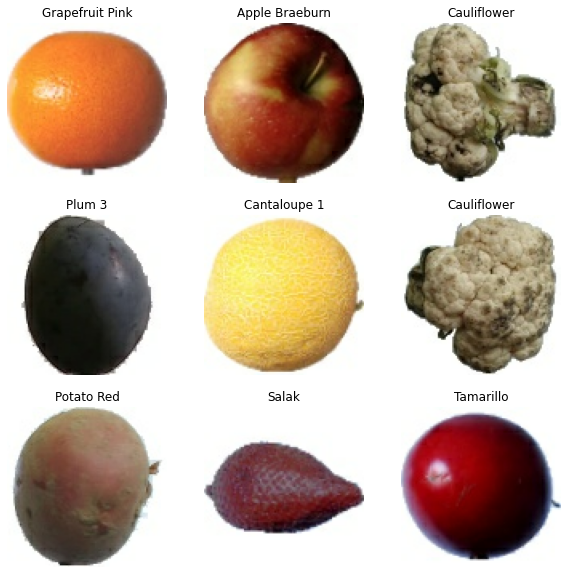

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i].numpy())])
    plt.axis("off")

# Code Taken From TensorFlow for Image Recognition

(For now, just for fun)

In [40]:
import tensorflow_datasets as tfds

In [41]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [42]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [43]:
model.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', 
                   patience=5, verbose=1,
                   restore_best_weights=True)

In [45]:
model.fit(
  train_ds,
  callbacks=[es],
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
424/424 [==============================] - 73s 99ms/step - loss: 0.8484 - accuracy: 0.7909 - val_loss: 0.0775 - val_accuracy: 0.9765
Epoch 2/50
424/424 [==============================] - 43s 102ms/step - loss: 0.0422 - accuracy: 0.9879 - val_loss: 0.0648 - val_accuracy: 0.9811
Epoch 3/50
424/424 [==============================] - 41s 95ms/step - loss: 0.0089 - accuracy: 0.9977 - val_loss: 0.0015 - val_accuracy: 0.9999
Epoch 4/50
424/424 [==============================] - 41s 96ms/step - loss: 0.0366 - accuracy: 0.9884 - val_loss: 0.0014 - val_accuracy: 0.9999
Epoch 5/50
424/424 [==============================] - 39s 92ms/step - loss: 0.0157 - accuracy: 0.9955 - val_loss: 0.0086 - val_accuracy: 0.9969
Epoch 6/50
424/424 [==============================] - 39s 91ms/step - loss: 0.0086 - accuracy: 0.9976 - val_loss: 9.0594e-04 - val_accuracy: 0.9999
Epoch 7/50
424/424 [==============================] - 38s 90ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 1.1070e-04 - val_

In [46]:
model.evaluate(test_ds)

178/178 [==============================] - 12s 67ms/step - loss: 0.3507 - accuracy: 0.9662


[0.35068875551223755, 0.9661935567855835]

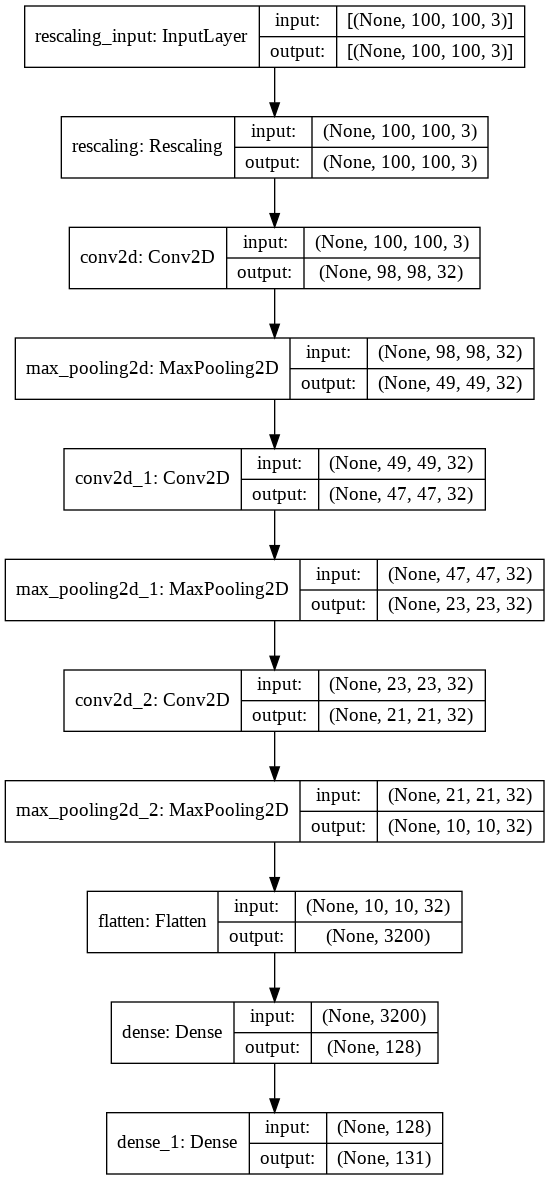

In [47]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

# Testing Trained Model on Custom Images

Prediction for Image Below: Watermelon


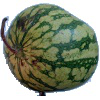

In [49]:
import PIL
image_path = "/content/data/fruits-360_dataset/fruits-360/Test/Watermelon/r_113_100.jpg"

image = PIL.Image.open(image_path)
image_resized = image.resize((100, 100))
image_array = np.array(image_resized).reshape(1, 100, 100, 3)

print("Prediction for Image Below:", class_names[np.argmax(model.predict(image_array))])
image_resized

# How to Save and Load Trained Models

In [59]:
model.save("/content/saved_model")

INFO:tensorflow:Assets written to: /content/saved_model/assets


In [60]:
loaded_model = tf.keras.models.load_model("/content/saved_model")

In [63]:
!zip -r saved_model.zip saved_model

from google.colab import files
files.download("/content/saved_model.zip")

updating: saved_model/ (stored 0%)
updating: saved_model/variables/ (stored 0%)
updating: saved_model/variables/variables.data-00000-of-00001 (deflated 20%)
updating: saved_model/variables/variables.index (deflated 67%)
updating: saved_model/assets/ (stored 0%)
updating: saved_model/saved_model.pb (deflated 89%)
updating: saved_model/keras_metadata.pb (deflated 91%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>